In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trainFile = 'train.csv'
testFile = 'test.csv'
trainDf = pd.read_csv(trainFile, index_col='Id')
testDf = pd.read_csv(testFile, index_col='Id')

In [3]:
trainDf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
testDf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
testDf.columns.difference(trainDf.columns)

Index([], dtype='object')

In [6]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

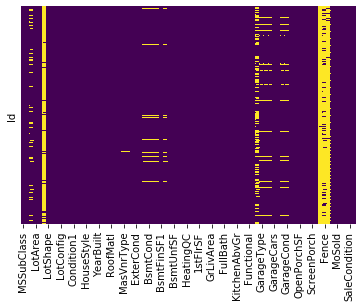

In [7]:
sns.heatmap(trainDf.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Too many NAs LotShape, Fence, GarageType

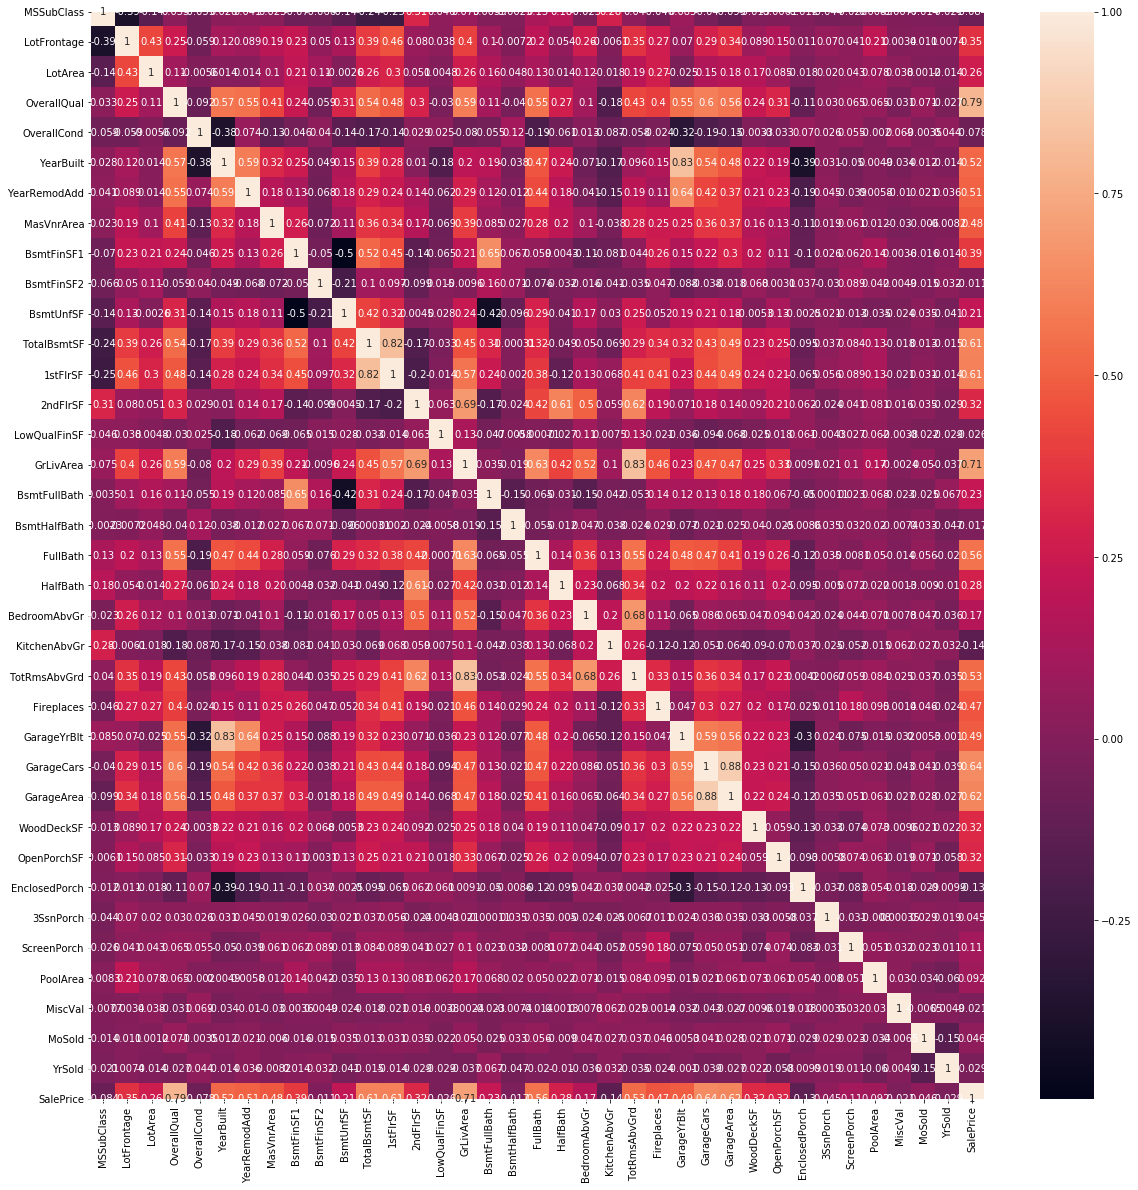

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(trainDf.corr(), annot=True)

In [9]:
# Create correlation matrix
corr_matrix = trainDf.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

In [10]:
# Drop features 
trainDf.drop(trainDf[to_drop], axis=1, inplace=True)
testDf.drop(testDf[to_drop], axis=1, inplace=True)

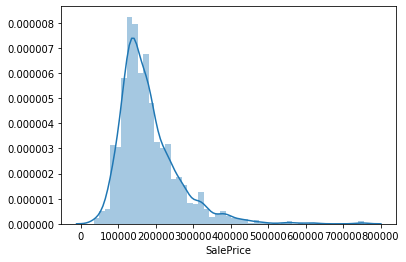

In [11]:
# distribution might normalize with log, but unnecessary with trees
sns.distplot(trainDf['SalePrice'])

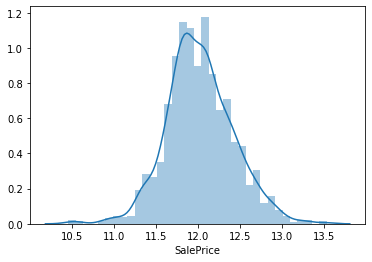

In [12]:
sns.distplot(np.log(trainDf['SalePrice']))

In [13]:
# Clean up NAs
# How many NAs?
NAs = pd.concat([trainDf.isnull().sum()], axis=1)
NAs[NAs.sum(axis=1) > 0]
missingCols = list(NAs[NAs.sum(axis=1) > 0].index)
missingCols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [14]:
missingCols = list(NAs[NAs.sum(axis=1) > 0].index)
missingCols
missingCols.remove('Electrical')
missingCols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [15]:
# zero out everything except electrical

In [16]:
# Fill NaN depending on what they are. Impute vs 0 out
dataframes = [trainDf,testDf]

for df in dataframes:
    for col in missingCols:
        df[col].fillna(0, inplace=True)

In [17]:
NAs[NAs.sum(axis=1) > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [18]:
# Test NAs
testNAs = pd.concat([testDf.isnull().sum()], axis=1)
testNAs[testNAs.sum(axis=1) > 0]
testMissingCols = list(testNAs[testNAs.sum(axis=1) > 0].index)
testNAs[testNAs.sum(axis=1) > 0]

,0
MSZoning,4
Utilities,2
Exterior1st,1
Exterior2nd,1
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFullBath,2
BsmtHalfBath,2


In [19]:
testFillList=['MSZoning','Utilities','Functional','SaleType']
testZeroList=[x for x in testMissingCols if x not in testFillList]
for col in testZeroList:
    testDf[col].fillna(0, inplace=True)

In [20]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(trainDf.drop(['SalePrice'],axis=1), trainDf['SalePrice'], test_size=0.3)

In [21]:
#Create Labeled Data
object_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
good_label_cols = [col for col in object_cols if set(X_train[col])==set(X_valid[col])]
bad_label_cols = list(set(object_cols)-set(good_label_cols))
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in good_label_cols:
    label_X_train[col] = le.fit_transform(X_train[col].astype(str))
    label_X_valid[col] = le.transform(X_valid[col].astype(str))
label_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 766 to 439
Data columns (total 59 columns):
MSSubClass       1022 non-null int64
MSZoning         1022 non-null int64
LotFrontage      1022 non-null float64
LotArea          1022 non-null int64
Street           1022 non-null int64
Alley            1022 non-null int64
LotShape         1022 non-null int64
LandContour      1022 non-null int64
LotConfig        1022 non-null int64
LandSlope        1022 non-null int64
Condition1       1022 non-null int64
BldgType         1022 non-null int64
HouseStyle       1022 non-null int64
OverallQual      1022 non-null int64
OverallCond      1022 non-null int64
YearBuilt        1022 non-null int64
YearRemodAdd     1022 non-null int64
RoofStyle        1022 non-null int64
MasVnrType       1022 non-null int64
MasVnrArea       1022 non-null float64
ExterQual        1022 non-null int64
Foundation       1022 non-null int64
BsmtQual         1022 non-null int64
BsmtExposure     1022 non-null int64


In [23]:
label_X_test = testDf.drop(bad_label_cols, axis=1)
for col in good_label_cols:
    label_X_test[col] = le.fit_transform(testDf[col].astype(str))
label_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 59 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null int64
Alley            1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null int64
LotConfig        1459 non-null int64
LandSlope        1459 non-null int64
Condition1       1459 non-null int64
BldgType         1459 non-null int64
HouseStyle       1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int64
MasVnrType       1459 non-null int64
MasVnrArea       1459 non-null float64
ExterQual        1459 non-null int64
Foundation       1459 non-null int64
BsmtQual         1459 non-null int64
BsmtExposure     1459 non-null int6

In [24]:
# Impute on training Data
from sklearn.impute import SimpleImputer

In [25]:
imputed_X_train = label_X_train
imputed_X_valid = label_X_valid

In [26]:
imputed_X_test = pd.DataFrame(columns=label_X_test.columns, index=label_X_test.index)
imputer = SimpleImputer(strategy='most_frequent')

In [27]:
imputed_X_test['MSZoning'] = imputer.fit_transform(label_X_test[['MSZoning']])
imputed_X_test = pd.concat([label_X_test.drop('MSZoning', axis=1), imputed_X_test['MSZoning']], axis = 1)

In [28]:
NAs = pd.concat([imputed_X_valid.isnull().sum()], axis=1)
NAs[NAs.sum(axis=1) > 0]

,0


In [29]:
testNAs = pd.concat([imputed_X_test.isnull().sum()], axis=1)
testNAs[testNAs.sum(axis=1) > 0]

,0


In [30]:
imputed_X_test.columns.difference(imputed_X_train.columns)

Index([], dtype='object')

In [68]:
# Create Model
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
hyper_space = {'n_estimators': [500, 1000, 1500],
               'max_depth':  [2, 3],
               'colsample_bytree': [0.1, 0.2, 0.3],
               #'subsample': [0.8, 1],
               'reg_lambda': [1.3, 1, 0.3],
              }
xgbr = XGBRegressor(eval_set=[(imputed_X_train, y_train), (imputed_X_valid, y_valid)],
                    objective='reg:squarederror',
                    n_jobs=-1,
                    eval_metric='rmse',
                    eta=0.1,
                    early_stopping_rounds=5,
                    verbosity=0)

In [69]:
gs = GridSearchCV(xgbr, hyper_space, cv=3)
gs_results = gs.fit(imputed_X_train, y_train)
print("BEST PARAMETERS: " + str(gs_results.best_params_))
print("BEST CV SCORE: " + str(gs_results.best_score_))

/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and wi

/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and wi

/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and wi

/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and wi

/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/garrickbercero/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and wi

BEST PARAMETERS: {'colsample_bytree': 0.2, 'max_depth': 2, 'n_estimators': 1000, 'reg_lambda': 1}
BEST CV SCORE: 0.9241774639509893


In [73]:
predTrain = gs.predict(label_X_train)
predValid = gs.predict(label_X_valid)

In [74]:
# metrics
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(np.log(y_train), np.log(predTrain)))


0.05880463869530303

In [75]:
np.sqrt(metrics.mean_squared_error(np.log(y_valid), np.log(predValid)))

0.16296675039408778

In [76]:
imputed_X_test = imputed_X_test[imputed_X_train.columns]

In [77]:
predTest = gs.predict(imputed_X_test)

In [78]:
presubmissionDf = pd.DataFrame(predTest, columns=['SalePrice'])
presubmissionDf.index = np.arange(1461, 1461+len(presubmissionDf))
presubmissionDf = pd.concat([imputed_X_test,presubmissionDf], axis=1)
presubmissionDf

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
1461,20,2,80.0,11622,1,0,3,3,4,0,...,0,0,120,0,3,0,6,2010,4,122700.773438
1462,20,3,81.0,14267,1,0,0,3,0,0,...,0,0,0,0,0,12500,6,2010,4,164866.156250
1463,60,3,74.0,13830,1,0,0,3,4,0,...,0,0,0,0,3,0,3,2010,4,188910.250000
1464,60,3,78.0,9978,1,0,0,3,4,0,...,0,0,0,0,0,0,6,2010,4,199537.906250
1465,120,3,43.0,5005,1,0,0,1,4,0,...,0,0,144,0,0,0,1,2010,4,189977.265625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,4,21.0,1936,1,0,3,3,4,0,...,0,0,0,0,0,0,6,2006,4,84614.601562
2916,160,4,21.0,1894,1,0,3,3,4,0,...,0,0,0,0,0,0,4,2006,0,80558.625000
2917,20,3,160.0,20000,1,0,3,3,4,0,...,0,0,0,0,0,0,9,2006,0,182691.484375
2918,85,3,62.0,10441,1,0,3,3,4,0,...,0,0,0,0,3,700,7,2006,4,126154.875000


In [79]:
submissionDf=pd.DataFrame(presubmissionDf['SalePrice'], columns=['SalePrice'])
submissionDf = submissionDf.rename_axis('Id')
submissionDf

,SalePrice
Id,
1461,122700.773438
1462,164866.156250
1463,188910.250000
1464,199537.906250
1465,189977.265625
...,...
2915,84614.601562
2916,80558.625000
2917,182691.484375


In [80]:
submissionDf.to_csv('housingPricePredictions.csv')